In [1]:
# normal modules
import pyart
import proplot as plot
import numpy as np
import warnings
import os, sys
import matplotlib.pyplot as plt

# add location of local leroy modules to sys.path and import them
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('leroy.py'))))
import leroy 
import qc 


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



## Import and plot data

In [20]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    radar = pyart.io.read("/home/564/jb2354/dev/breezy/media/interp_experiments/elliptical_storm_noisy_2.nc")
    radar.add_field_like('dbz', 'dbz_original', radar.fields['dbz']['data'])
    radar.add_field_like('dbz', 'fake', radar.fields['dbz']['data'].mask)
    radar = qc.mask_invalid_data(radar, 'dbz', add_to = ['dbz', 'fake'], min_field = 5, min_area = 20, return_smooth = True)
    radar.add_field_like('dbz_smooth', 'dbz_smooth_masked', np.ma.masked_array(radar.fields['dbz_smooth']['data'], radar.fields['fake']['data'].mask))

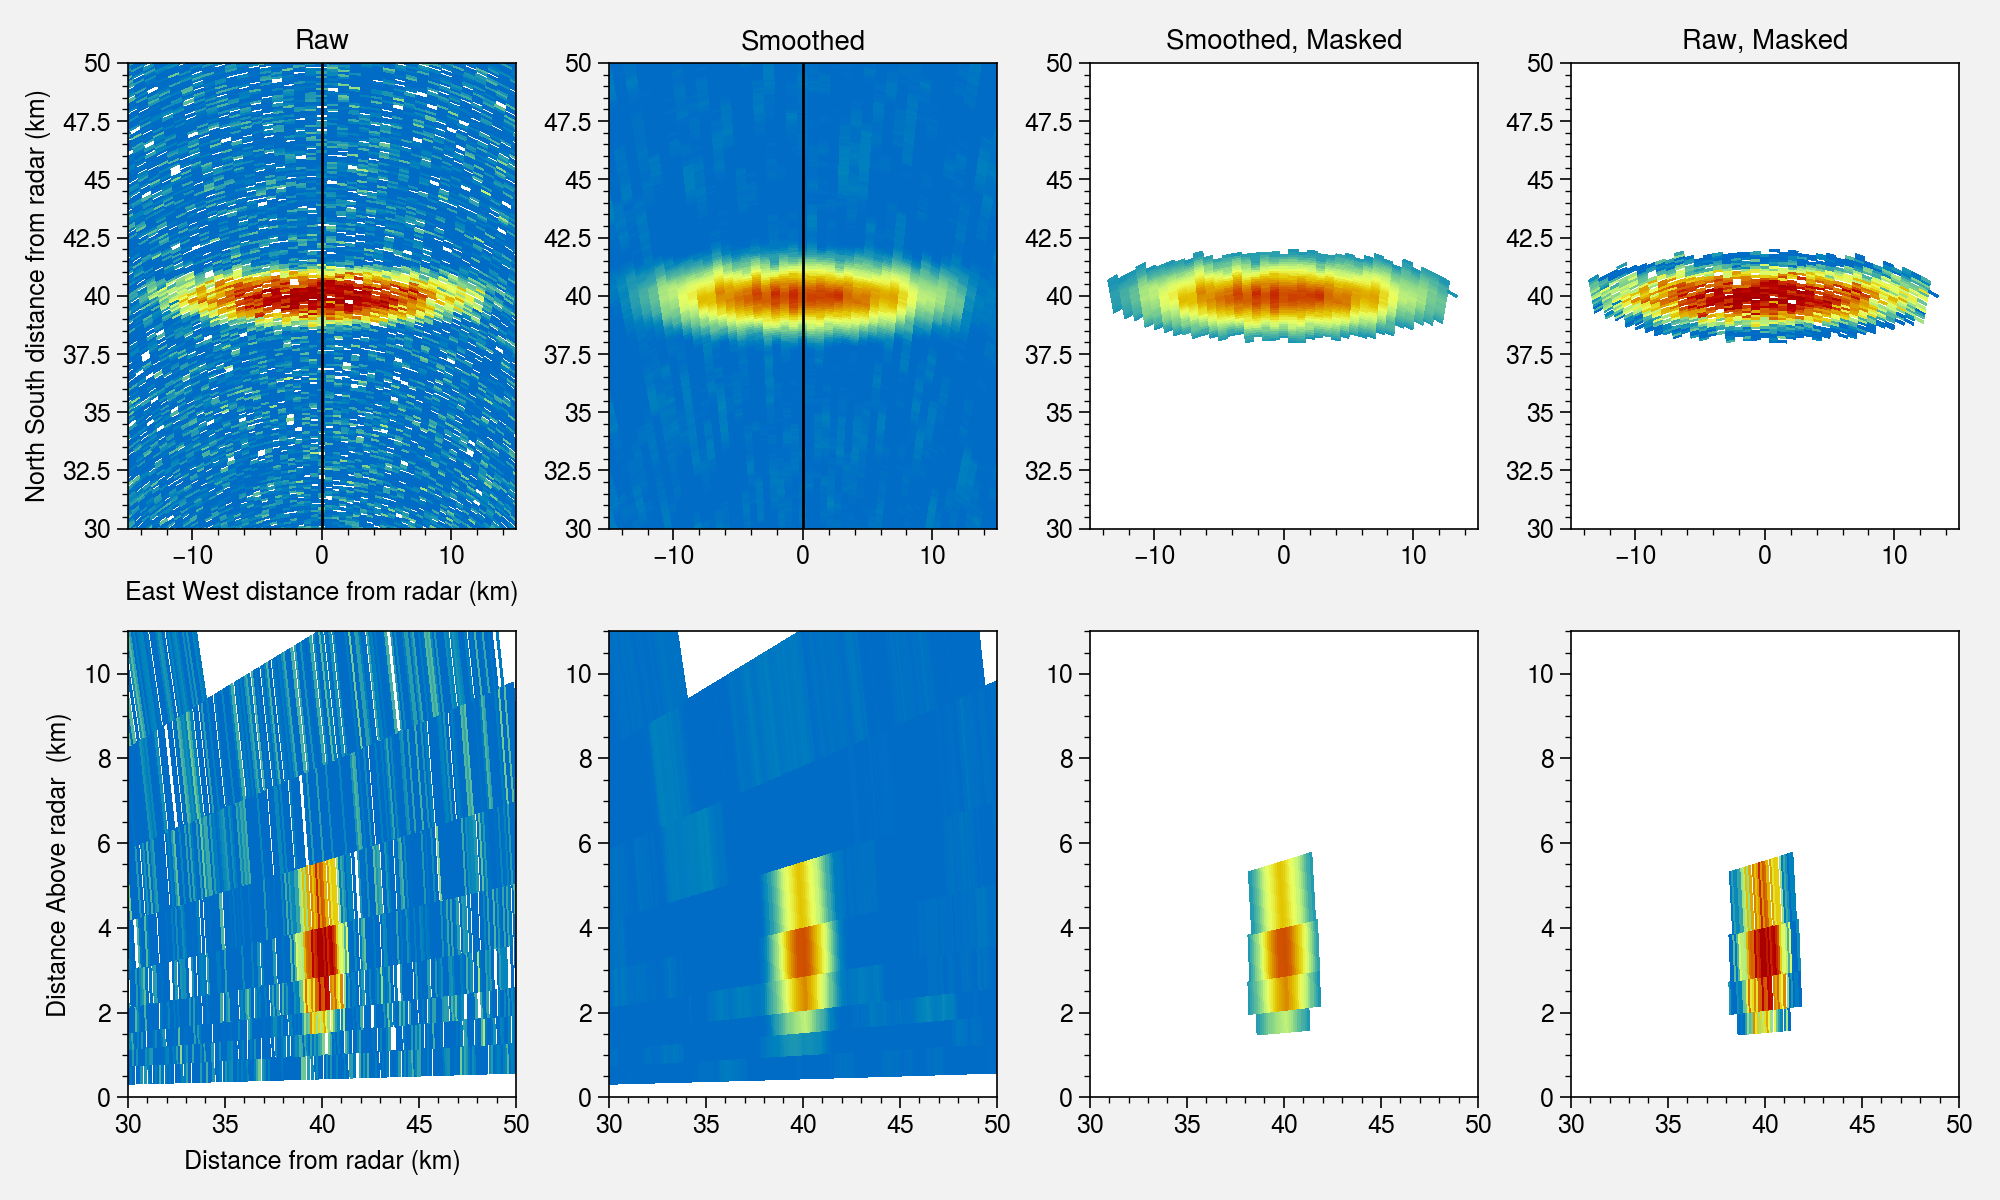

In [34]:
# create the plot using RadarDisplay
tilt, ray, vmin, vmax = 4,0, 0, 50
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(241)
display.plot_ppi('dbz_original', tilt, ax=ax,colorbar_flag= False,
             colorbar_label='',vmin = vmin, vmax = vmax, title=  'Raw',cmap = 'pyart_homeyerrainbow')
display.set_limits((-15, 15), (30, 50), ax=ax)
plt.plot([0,0], [30,50], 'k-', lw = 1)

ax = fig.add_subplot(242)
display.plot_ppi('dbz_smooth', tilt, ax=ax,colorbar_flag= False, axislabels_flag = False,
             colorbar_label='',vmin = vmin, vmax = vmax, title=  'Smoothed',cmap = 'pyart_homeyerrainbow')
display.set_limits((-15, 15), (30, 50), ax=ax)
plt.plot([0,0], [30,50], 'k-', lw = 1)

ax = fig.add_subplot(243)
display.plot_ppi('dbz_smooth_masked', tilt, ax=ax,colorbar_flag= False, axislabels_flag = False,
             colorbar_label='',vmin = vmin, vmax = vmax, title=  'Smoothed, Masked',cmap = 'pyart_homeyerrainbow')
display.set_limits((-15, 15), (30, 50), ax=ax)

ax = fig.add_subplot(244)
display.plot_ppi('dbz', tilt, ax=ax,colorbar_flag= False, axislabels_flag = False,
             colorbar_label='',vmin = vmin, vmax = vmax, title=  'Raw, Masked',cmap = 'pyart_homeyerrainbow')
display.set_limits((-15, 15), (30, 50), ax=ax)

xsect = pyart.util.cross_section_ppi(radar, [ray])
display = pyart.graph.RadarDisplay(xsect)

ax = fig.add_subplot(245)
display.plot('dbz_original', 0, colorbar_flag= False, vmin = vmin, vmax = vmax,
             title=  '',cmap = 'pyart_homeyerrainbow')
display.set_limits((30, 50), (0, 11), ax=ax)
display = pyart.graph.RadarDisplay(xsect)

ax = fig.add_subplot(246)
display.plot('dbz_smooth', 0, colorbar_flag= False, vmin = vmin, vmax = vmax, 
             axislabels_flag = False, title=  '',cmap = 'pyart_homeyerrainbow')
display.set_limits((30, 50), (0, 11), ax=ax)
display = pyart.graph.RadarDisplay(xsect)

ax = fig.add_subplot(247)
display.plot('dbz_smooth_masked', 0, colorbar_flag= False, vmin = vmin, vmax = vmax, 
             axislabels_flag = False,title=  '',cmap = 'pyart_homeyerrainbow')
display.set_limits((30, 50), (0, 11), ax=ax)

ax = fig.add_subplot(248)
display.plot('dbz', 0, colorbar_flag= False, vmin = vmin, vmax = vmax, title=  '',
             axislabels_flag = False,cmap = 'pyart_homeyerrainbow')
display.set_limits((30, 50), (0, 11), ax=ax)

plt.tight_layout()
plt.show()

## Visualize smoothing along ray

In [7]:
raw_data = radar.get_field(tilt, 'dbz_original')
smooth_data = radar.get_field(tilt, 'dbz_smooth')
x,y,z = radar.get_gate_x_y_z(tilt)


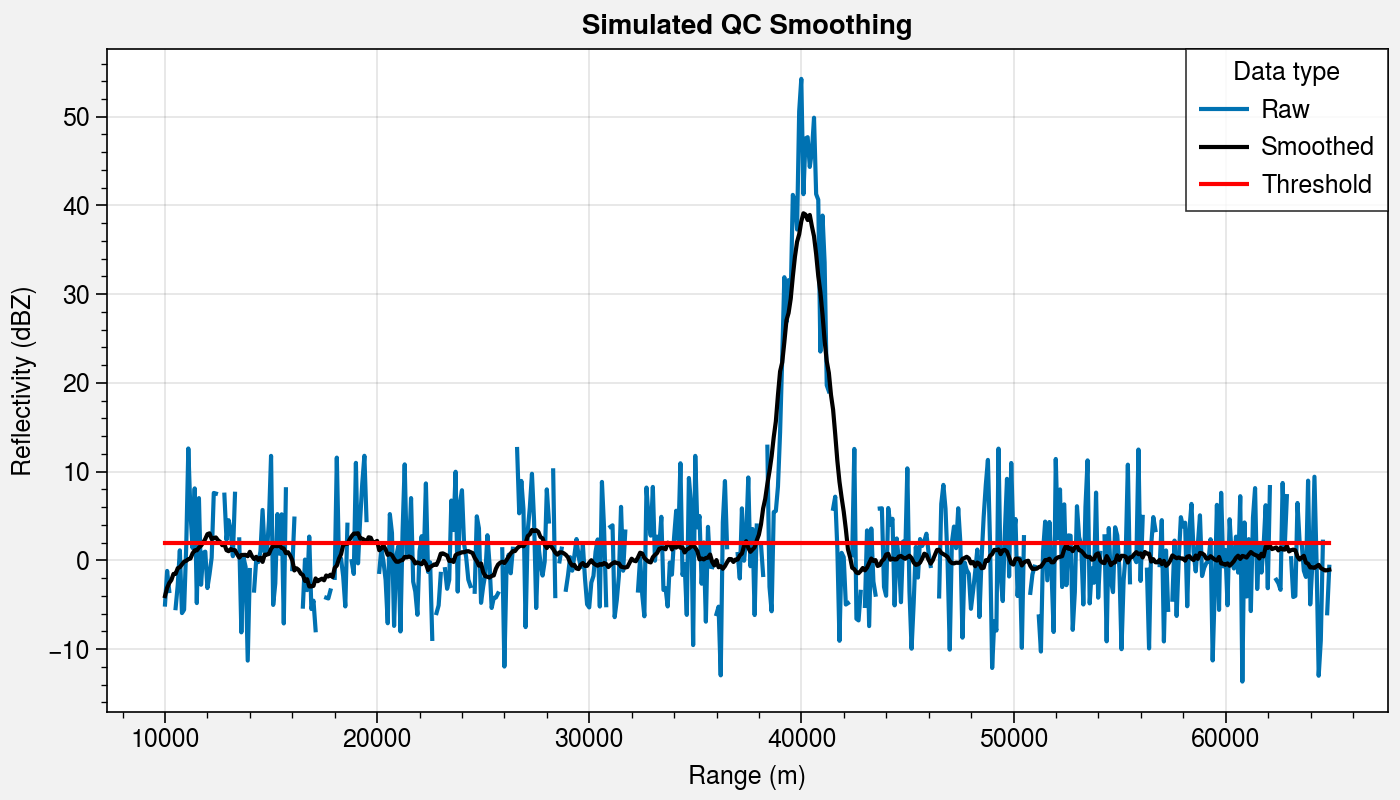

In [47]:
ray = 62
r = np.sqrt(x**2 + y**2 + z**2)

fig, axs = plot.subplots(figsize = (7,4))
h1 = axs.plot(r[ray, :], raw_data[ray,:], label = 'Raw')
h2 = axs.plot(r[ray, :], smooth_data[ray,:], 'k', label = 'Smoothed')
h3 = axs.plot([r[ray, 0], r[ray, -1]], [2,2], 'r', label = 'Threshold')
axs.legend([h1,h2,h3], loc='ur', ncols=1, center=False, title='Data type')
axs.format(xlabel = 'Range (m)', ylabel = 'Reflectivity (dBZ)', suptitle = 'Simulated QC Smoothing')
plot.show()

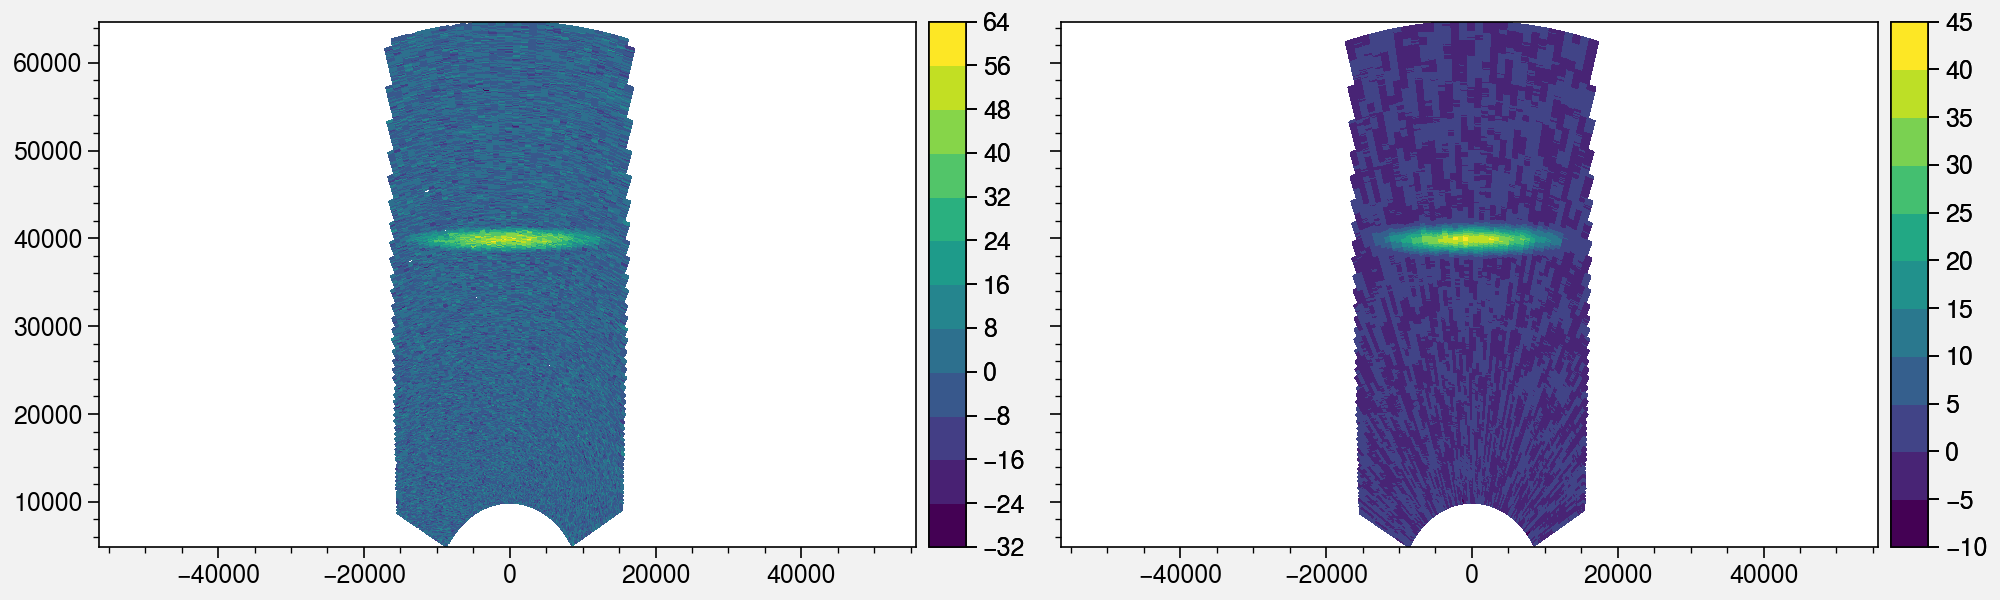

In [22]:
fig, axs = plot.subplots(ncols = 2, figsize = (10,3))
axs[0].pcolormesh(x,y,raw_data, colorbar = 'r', cmap = 'viridis')
axs[1].pcolormesh(x,y,smooth_data, colorbar = 'r', cmap = 'viridis')
plot.show()

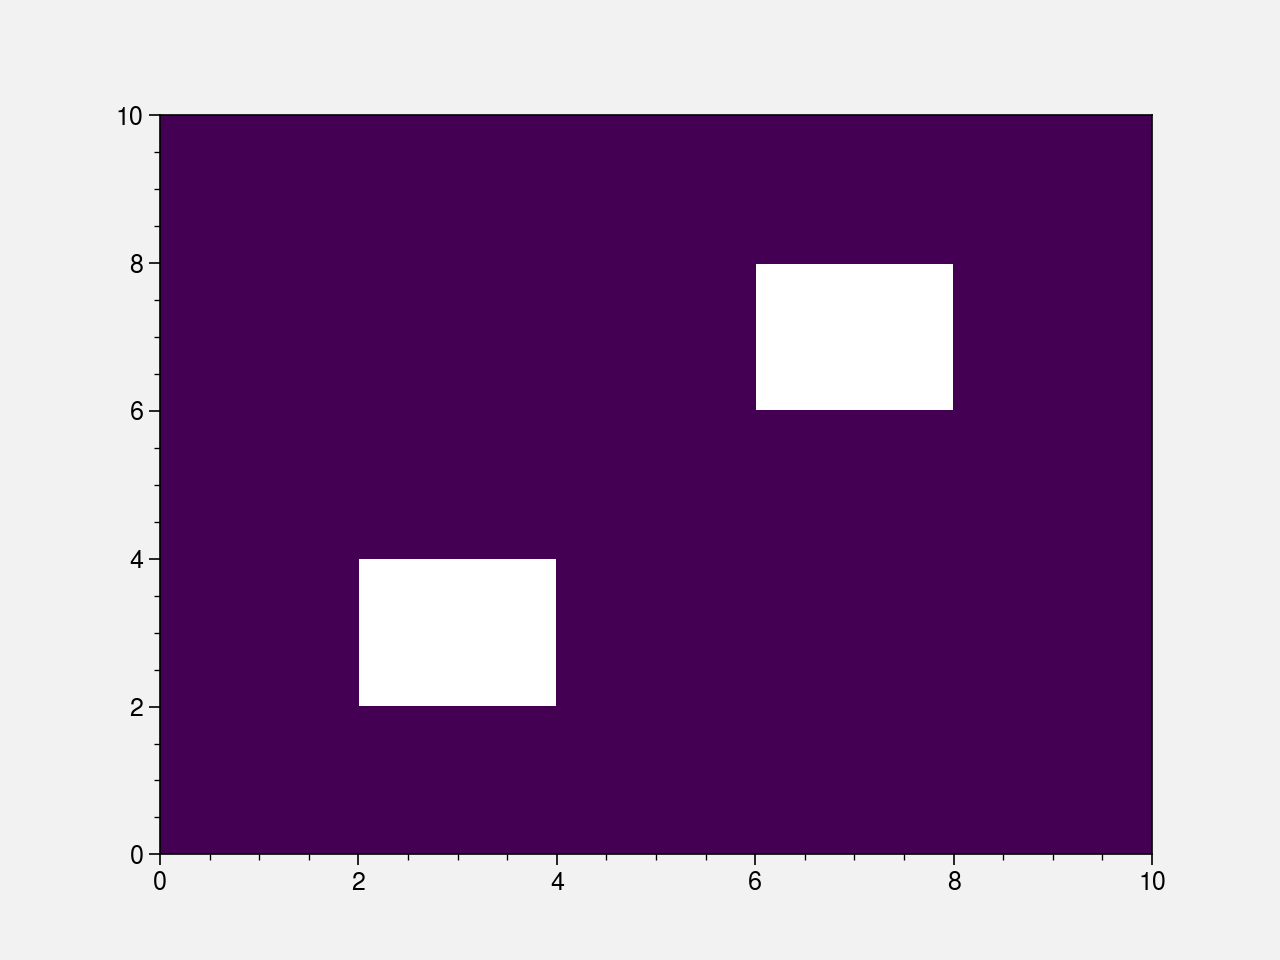

In [524]:
a,mask,mask2 = np.zeros((3,10,10))
mask[2:4,2:4],mask2[6:8,6:8]=[1,1]
b = np.ma.masked_array(a, mask)
c = np.ma.masked_array(b, mask2)

plt.pcolormesh(c,cmap ='viridis')

In [53]:
radar.ray_angle_res

In [59]:
ob_dict

{'data': masked_array(
   data=[[--, --, --, ..., 1, 1, 1],
         [--, --, --, ..., 1, 1, 1],
         [--, --, --, ..., 1, 1, 1],
         ...,
         [--, --, --, ..., 3, 3, 3],
         [--, --, --, ..., 3, 3, 3],
         [--, --, --, ..., 3, 3, 3]],
   mask=[[ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         ...,
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False]],
   fill_value=999999,
   dtype=int32),
 'units': 'None',
 'long_name': 'Objects in Scan',
 'standard_name': 'objects_in_scan',
 'coordinates': 'elevation azimuth range',
 'valid_max': 3,
 'valid_min': 1}

In [ ]:
# def mask_invalid_data(radar, field, correlation_length = 2000, min_field = 0, min_size = 100, replace_existing= False):
#     """
#     Apply a mask to an existing or new radar field. The mask attempts to filter out 
#     bad values by masking data outside of contiguous objects within ppi scans.
    
#     radar (pyart object): pyar radar object
#     field (string): radar field name
#     correlation_length (float): greater length, greater convolutional smoothing window
#     min_field (float): field value threshold for valid data
#     min_size (int): minimum number of contiguous gates (area) for objects above min-field
#     dilate (int): rough distance to dilate the object masks by
#     replace_exsiting (bool): whether to create a new field with the mask or to add it to original
#     """
#     smooth_data, mask = np.ma.zeros((2,radar.nrays, radar.ngates))
#     smooth_fn = field+'_smoothed'
#     d_gate = int(np.round(dilate/np.mean(np.diff(radar.range['data']))))
#     Is = radar.sweep_start_ray_index['data']
#     Ie = radar.sweep_end_ray_index['data']+1    
#     nsweeps=radar.nsweeps
#     for sweep in range(nsweeps):
#         smooth_data[radar.get_slice(sweep)] = smooth_ppi(radar, field, sweep, correlation_length)
#     radar.add_field_like(field, smooth_fn, smooth_data, replace_existing = True)
#     for sweep in range(nsweeps):
#         da = np.radians(np.mean(np.diff(radar.azimuth['data'][Is[sweep]:Ie[sweep]])))
#         obj_dict = pyart.correct.find_objects(radar, smooth_fn, min_field, sweeps=sweep)
#         label = clear_small_echoes(obj_dict['data'].filled(0), min_size)
#         label_mask = label >0
#         if np.sum(label_mask)>0:
#             r_mean = np.mean(np.repeat(radar.range['data'][np.newaxis,:], radar.rays_per_sweep['data'][sweep], axis=0)[label>0])
#             d_ray = int(np.round(dilate/(r_mean*da)))
#             print(mask.shape)
#             print(d_gate, d_ray)
#             label = dilation(label, np.ones((d_gate,d_ray)))
#         mask[radar.get_slice(sweep)] = label == 0
#     if replace_existing:
#         radar.fields[field]['data'] = np.ma.masked_array(radar.fields[field]['data'], mask) 
#         radar.fields.pop(smooth_fn)
#     else:
#         radar.fields[smooth_fn]['data'] = np.ma.masked_array(radar.fields[field]['data'], mask) 
#     return radar